In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_train = pd.read_csv('train.csv')
loan_train.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


In [3]:
loan_train.m13.value_counts()

0    115422
1       636
Name: m13, dtype: int64

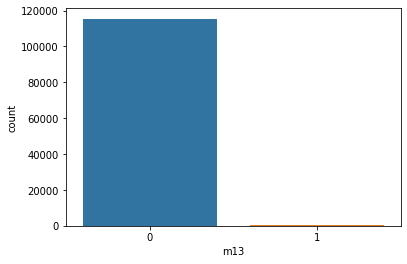

In [4]:
sns.countplot(x='m13',data=loan_train)
plt.show()

In [5]:
#Highly biased dataset

In [6]:
loan_train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [7]:
def basic_details(df):
    b = pd.DataFrame()
    b['Null Values'] = df.isnull().sum()
    b['Data Type'] = df.dtypes
    b['Unique Values'] = df.nunique()
    return b

In [8]:
basic_details(loan_train)

,Null Values,Data Type,Unique Values
loan_id,0,int64,116058
source,0,object,3
financial_institution,0,object,19
interest_rate,0,float64,923
unpaid_principal_bal,0,int64,646
loan_term,0,int64,140
origination_date,0,object,3
first_payment_date,0,object,4
loan_to_value,0,int64,92
number_of_borrowers,0,float64,2


In [9]:
loan_train.shape

(116058, 29)

In [10]:
loan_train_new = loan_train.copy()

In [11]:
loan_train_new.corr()['m13']

loan_id                    -0.002982
interest_rate               0.054298
unpaid_principal_bal       -0.017120
loan_term                   0.023502
loan_to_value               0.016357
number_of_borrowers        -0.039979
debt_to_income_ratio        0.038033
borrower_credit_score      -0.094215
insurance_percent           0.005722
co-borrower_credit_score   -0.042651
insurance_type              0.005999
m1                          0.092054
m2                          0.146921
m3                          0.157394
m4                          0.218956
m5                          0.259529
m6                          0.287712
m7                          0.309072
m8                          0.339362
m9                          0.369138
m10                         0.367840
m11                         0.410213
m12                         0.466442
m13                         1.000000
Name: m13, dtype: float64

In [12]:
loan_train_new = pd.get_dummies(loan_train_new)

In [13]:
loan_train_new.corr()['m13']

loan_id                                             -0.002982
interest_rate                                        0.054298
unpaid_principal_bal                                -0.017120
loan_term                                            0.023502
loan_to_value                                        0.016357
number_of_borrowers                                 -0.039979
debt_to_income_ratio                                 0.038033
borrower_credit_score                               -0.094215
insurance_percent                                    0.005722
co-borrower_credit_score                            -0.042651
insurance_type                                       0.005999
m1                                                   0.092054
m2                                                   0.146921
m3                                                   0.157394
m4                                                   0.218956
m5                                                   0.259529
m6      

In [14]:
loan_train_new.drop(columns='financial_institution_Anderson-Taylor',inplace=True)
loan_train_new.drop(columns='financial_institution_Browning-Hart',inplace=True)
loan_train_new.drop(columns='financial_institution_Chapman-Mcmahon',inplace=True)
loan_train_new.drop(columns='financial_institution_Cole, Brooks and Vincent',inplace=True)
loan_train_new.drop(columns='financial_institution_Edwards-Hoffman',inplace=True)
loan_train_new.drop(columns='financial_institution_Martinez, Duffy and Bird',inplace=True)
loan_train_new.drop(columns='financial_institution_Miller, Mcclure and Allen',inplace=True)
loan_train_new.drop(columns='financial_institution_Nicholson Group',inplace=True)
loan_train_new.drop(columns='financial_institution_OTHER',inplace=True)
loan_train_new.drop(columns='financial_institution_Richards-Walters',inplace=True)
loan_train_new.drop(columns='financial_institution_Richardson Ltd',inplace=True)
loan_train_new.drop(columns='financial_institution_Romero, Woods and Johnson',inplace=True)
loan_train_new.drop(columns='financial_institution_Sanchez, Hays and Wilkerson',inplace=True)
loan_train_new.drop(columns='financial_institution_Sanchez-Robinson',inplace=True)
loan_train_new.drop(columns='financial_institution_Suarez Inc',inplace=True)
loan_train_new.drop(columns='financial_institution_Swanson, Newton and Miller',inplace=True)
loan_train_new.drop(columns='financial_institution_Taylor, Hunt and Rodriguez',inplace=True)
loan_train_new.drop(columns='financial_institution_Thornton-Davis',inplace=True)
loan_train_new.drop(columns='financial_institution_Turner, Baldwin and Rhodes',inplace=True)
loan_train_new.drop(columns='origination_date_2012-01-01',inplace=True)
loan_train_new.drop(columns='origination_date_2012-02-01',inplace=True)
loan_train_new.drop(columns='origination_date_2012-03-01',inplace=True)
loan_train_new.drop(columns='first_payment_date_02/2012',inplace=True)
loan_train_new.drop(columns='first_payment_date_03/2012',inplace=True)
loan_train_new.drop(columns='first_payment_date_04/2012',inplace=True)
loan_train_new.drop(columns='first_payment_date_05/2012',inplace=True)
loan_train_new.drop(columns='loan_id',inplace=True)
# loan_train_new.drop(columns='insurance_percent',inplace=True)
# loan_train_new.drop(columns='insurance_type',inplace=True)
# loan_train_new.drop(columns='unpaid_principal_bal',inplace=True)
# loan_train_new.drop(columns='loan_term',inplace=True)
# loan_train_new.drop(columns='loan_to_value',inplace=True)
# loan_train_new.drop(columns='debt_to_income_ratio',inplace=True)

In [15]:
# Feature Engineering

In [16]:
loan_train_new['Average_credit_score'] = (loan_train_new['borrower_credit_score']+loan_train_new['co-borrower_credit_score'])/ loan_train_new['number_of_borrowers']
loan_train_new.drop(columns='number_of_borrowers',inplace=True)
loan_train_new.drop(columns='borrower_credit_score',inplace=True)
loan_train_new.drop(columns='co-borrower_credit_score',inplace=True)
loan_train_new.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,...,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score
0,4.250,214000,360,95,22.0,30.0,0.0,0,0,0,...,0,0,1,0,0,1,0,0,1,694.0
1,4.875,144000,360,72,44.0,0.0,0.0,0,0,0,...,1,0,1,0,1,0,0,1,0,697.0
2,3.250,366000,180,49,33.0,0.0,0.0,0,0,0,...,0,0,1,0,0,1,0,1,0,780.0
3,4.750,135000,360,46,44.0,0.0,0.0,0,0,0,...,1,1,1,1,0,0,0,1,0,635.5
4,4.750,124000,360,80,43.0,0.0,0.0,0,1,2,...,10,11,1,1,0,0,0,0,1,681.0


In [17]:
loan_train_new['loan_term_years'] = loan_train_new['loan_term']/12
loan_train_new.drop(columns='loan_term',inplace=True)
loan_train_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years
0,4.250,214000,95,22.0,30.0,0.0,0,0,0,0,...,0,1,0,0,1,0,0,1,694.0,30.0
1,4.875,144000,72,44.0,0.0,0.0,0,0,0,0,...,0,1,0,1,0,0,1,0,697.0,30.0
2,3.250,366000,49,33.0,0.0,0.0,0,0,0,0,...,0,1,0,0,1,0,1,0,780.0,15.0
3,4.750,135000,46,44.0,0.0,0.0,0,0,0,0,...,1,1,1,0,0,0,1,0,635.5,30.0
4,4.750,124000,80,43.0,0.0,0.0,0,1,2,3,...,11,1,1,0,0,0,0,1,681.0,30.0


In [18]:
loan_train_new['monthly_installment'] = ((loan_train_new.unpaid_principal_bal)*(1+(loan_train_new.interest_rate)/100))/((loan_train_new.loan_term_years)*12)
loan_train_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years,monthly_installment
0,4.250,214000,95,22.0,30.0,0.0,0,0,0,0,...,1,0,0,1,0,0,1,694.0,30.0,619.708333
1,4.875,144000,72,44.0,0.0,0.0,0,0,0,0,...,1,0,1,0,0,1,0,697.0,30.0,419.500000
2,3.250,366000,49,33.0,0.0,0.0,0,0,0,0,...,1,0,0,1,0,1,0,780.0,15.0,2099.416667
3,4.750,135000,46,44.0,0.0,0.0,0,0,0,0,...,1,1,0,0,0,1,0,635.5,30.0,392.812500
4,4.750,124000,80,43.0,0.0,0.0,0,1,2,3,...,1,1,0,0,0,0,1,681.0,30.0,360.805556


In [19]:
cor=loan_train_new.corr()

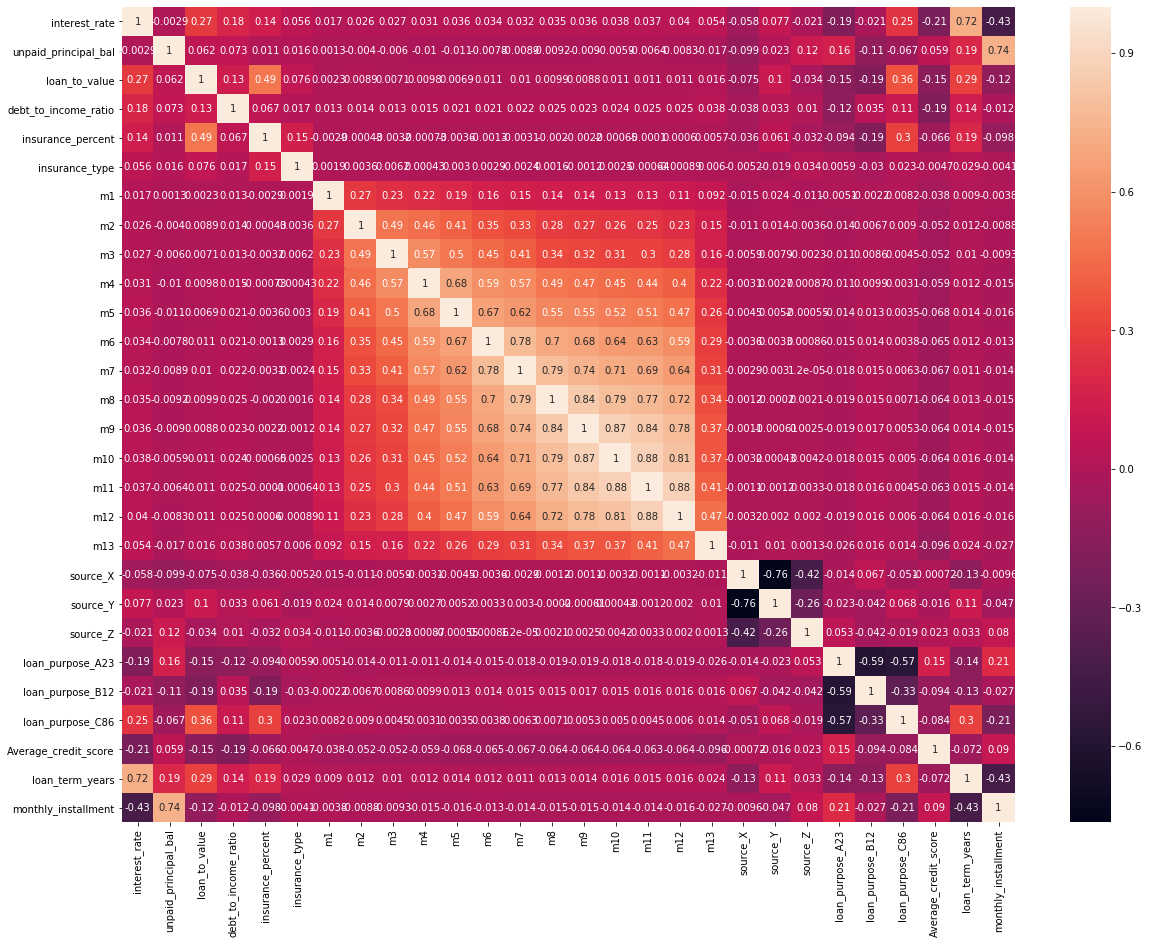

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show()

In [21]:
data = loan_train_new.copy()

In [22]:
x = data.drop(columns='m13')
y = data['m13']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 45)

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score , confusion_matrix ,recall_score ,precision_score,f1_score
accuracy_score(y_test, y_pred)

0.9943707277844793

In [26]:
confusion_matrix(y_test, y_pred)

array([[34622,     0],
       [  196,     0]], dtype=int64)

In [27]:
#We can clearly see, this is a bad model. This model is not able to classify clients who are not defaluters on the 13th month.

In [28]:
recall_score(y_test, y_pred)

0.0

In [29]:
precision_score(y_test, y_pred)

0.0

In [30]:
f1_score(y_test,y_pred)

0.0

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
y_train.value_counts()

0    80800
1      440
Name: m13, dtype: int64

In [33]:
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)

In [34]:
np.bincount(y_train)

array([80800, 80800], dtype=int64)

In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [36]:
accuracy_score(y_test, y_pred)

0.897552989832845

In [37]:
confusion_matrix(y_test, y_pred)

array([[31113,  3509],
       [   58,   138]], dtype=int64)

In [38]:
precision_score(y_test, y_pred)

0.03783931998903208

In [39]:
recall_score(y_test, y_pred)

0.7040816326530612

In [40]:
f1_score(y_test,y_pred)

0.07181889149102264

In [41]:
# Decision Tree

In [42]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"],
    'random_state':range(0,101)
}

n_folds = 10

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
random_cv = RandomizedSearchCV(estimator=dtree,
                               param_distributions=param_grid,
                               cv=n_folds, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Fit the grid search to the data
random_cv.fit(x_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [43]:
print("best accuracy", random_cv.best_score_)

best accuracy -0.011782178217821782


In [44]:
print(random_cv.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')


In [45]:
dtc = random_cv.best_estimator_

dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [46]:
pred_dtc = dtc.predict(x_test)

In [47]:
accuracy_score(y_test, pred_dtc)

0.98854041013269

In [48]:
confusion_matrix(y_test, pred_dtc)

array([[34324,   298],
       [  101,    95]], dtype=int64)

In [49]:
print('Precision is: ',precision_score(y_test, pred_dtc))
print('Recall is: ',recall_score(y_test, pred_dtc))
print('F1 Score is: ',f1_score(y_test,pred_dtc))

Precision is:  0.24173027989821882
Recall is:  0.4846938775510204
F1 Score is:  0.3225806451612903


In [50]:
# Random Forest

In [51]:
param_grid = {'n_estimators': range(10, 50, 10),
                'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
             }

n_folds = 5

# Instantiate the grid search model
rfc = RandomForestClassifier()
random_cv = RandomizedSearchCV(estimator=rfc,
                               param_distributions=param_grid,
                               cv=n_folds, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Fit the grid search to the data
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [52]:
print("best accuracy", random_cv.best_score_)

best accuracy -0.01172029702970297


In [53]:
print(random_cv.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [54]:
rfc = random_cv.best_estimator_

In [55]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
pred_rfc = rfc.predict(x_test) 

In [57]:
accuracy_score(y_test, pred_rfc)

0.9943994485610891

In [58]:
confusion_matrix(y_test, pred_rfc)

array([[34509,   113],
       [   82,   114]], dtype=int64)

In [59]:
print('Precision is: ',precision_score(y_test, pred_rfc))
print('Recall is: ',recall_score(y_test, pred_rfc))
print('F1 Score is: ',f1_score(y_test,pred_rfc))

Precision is:  0.5022026431718062
Recall is:  0.5816326530612245
F1 Score is:  0.5390070921985816


In [60]:
# LightGBMClassifier

In [61]:
from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier(n_jobs=-1)

lightgbm.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
pred_lgbm = lightgbm.predict(x_test)

In [63]:
accuracy_score(y_test, pred_lgbm)

0.9953185134126027

In [64]:
confusion_matrix(y_test, pred_lgbm)

array([[34574,    48],
       [  115,    81]], dtype=int64)

In [65]:
print('Precision is: ',precision_score(y_test, pred_lgbm))
print('Recall is: ',recall_score(y_test, pred_lgbm))
print('F1 Score is: ',f1_score(y_test,pred_lgbm))

Precision is:  0.627906976744186
Recall is:  0.413265306122449
F1 Score is:  0.4984615384615385


In [66]:
#XGBClassifier

In [67]:
from xgboost import XGBClassifier

In [68]:
param_grid = {'n_estimators': range(10, 50, 10),
                'max_depth': range(5, 25, 5),
             }

n_folds = 5

# Instantiate the grid search model
xgb = XGBClassifier()
random_cv = RandomizedSearchCV(estimator=xgb,
                               param_distributions=param_grid,
                               cv=n_folds, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Fit the grid search to the data
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [69]:
print("best accuracy", random_cv.best_score_)

best accuracy -0.0029393564356435644


In [70]:
print(random_cv.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [71]:
xgb = random_cv.best_estimator_

In [92]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [93]:
pred_xgb = xgb.predict(x_test)

In [94]:
accuracy_score(y_test, pred_xgb)

0.9953759549658223

In [95]:
confusion_matrix(y_test, pred_xgb)

array([[34570,    52],
       [  109,    87]], dtype=int64)

In [96]:
print('Precision is: ',precision_score(y_test, pred_xgb))
print('Recall is: ',recall_score(y_test, pred_xgb))
print('F1 Score is: ',f1_score(y_test,pred_xgb))

Precision is:  0.6258992805755396
Recall is:  0.44387755102040816
F1 Score is:  0.5194029850746269
